In [525]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import SpectralClustering

# Question 2: Clustering using the **Lloyd's Algorithm** and it's derivatives

#### Sorting out Data

In [526]:
df = pd.read_csv('/content/cm_dataset_2 - cm_dataset.csv')
df.loc[999] = df.columns[0], df.columns[1]

df.columns = ['x', 'y']
df.describe()

,x,y
count,1000.000,1000.000
unique,989.000,987.000
top,-10.386,-10.476
freq,2.000,2.000


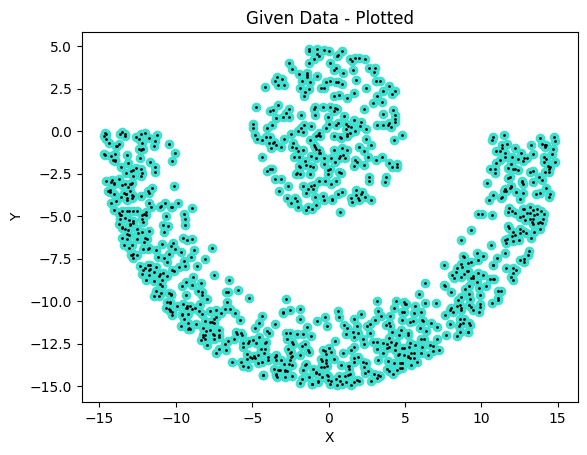

In [527]:
plt.scatter(df['x'],df['y'], c = 'turquoise')
plt.scatter(df['x'],df['y'], c = 'k', s =1)

plt.title("Given Data - Plotted")
plt.xlabel("X")
plt.ylabel('Y')

plt.show()

#### Code to compute the Algorithm (Piecewise Seperated)

In [559]:
k =  4 # K-means Cluster allocations
n = 1000 #data points

##### Function: **Finds mean of the set at the instant for z cluster allocation**

In [560]:
def compute_mean(x, z):
  μ = np.zeros((k,2))
  count = np.zeros((k,1))
  for i in range(len(x)):
    μ[int(z[i][0])-1] += x[i]
    count[(int)(z[i][0])-1] += 1
  for j in range(k):
    μ[j] = μ[j]/count[j]
  return μ

##### Function: **finds the next best cluster allocation by finding nearest mean to each point**

In [561]:
def best_cluster(x,z,mean):
  new_z = np.zeros((1000,1))
  for i in range(n):
    new_z[i] = np.argmin([np.linalg.norm(x[i]-mu) for mu in mean]) + 1
  return new_z

##### Function: **Error of current clustering from ideal k = n clustering**

In [562]:
def errr(x,z,mean):         # error of current clustering from ideal k = n clustering
  e = 0
  for i in range(n):
    e += np.linalg.norm(x[i]-mean[int(z[i][0])-1])**2
  return e

##### Function: **Lloyd's Algorithm uses previous functions to iterate through**

In [563]:
def kmeans(x):
  z = np.zeros((1000,1))
  re_z = np.zeros((1000,1))
  err = []

  mean = np.zeros(k)                             # Generate k random means
  mean_re = random.sample([x_i for x_i in x], k)

  flag = np.array_equal(mean, mean_re)

  for i in range(100):
    mean = mean_re
    z = best_cluster(x, z, mean)
    mean_re = compute_mean(x,z)
    err.append(errr(x,z,mean_re))

  #plt.show()
  #print(mean)

  plt.plot(err)
  plt.ylabel('Error')
  plt.xlabel('Iteration')
  return z,mean

In [564]:
# Centering the Datapoints

df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
x = df.to_numpy()
x =  x - np.mean(x, axis =0)

#### Observations and plot for K split clustering

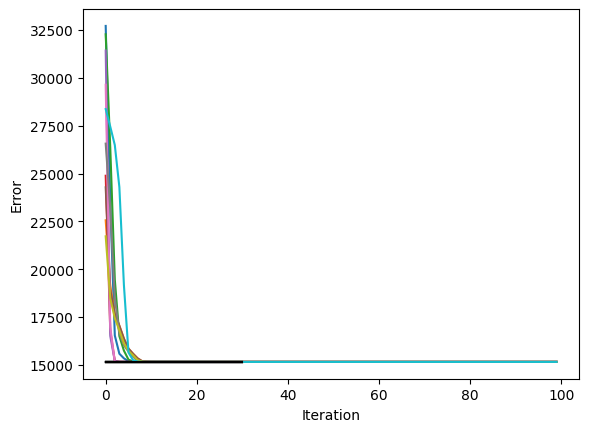

In [565]:
min = 90000
for trials in range(10):
  z, mean = kmeans(x)
  te =  errr(x, z, compute_mean(x, z))
  if min > te:
    min = te

  xx = np.linspace(0,30,30)
  plt.plot(xx, np.full(30, min), c = 'k')
  #plt.plot(error, color = c[trials])


<ipython-input-566-52da5a130ae4>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(x[i][0], x[i][1], c = color[-1+int(z[i])-1])


Text(0, 0.5, 'Y')

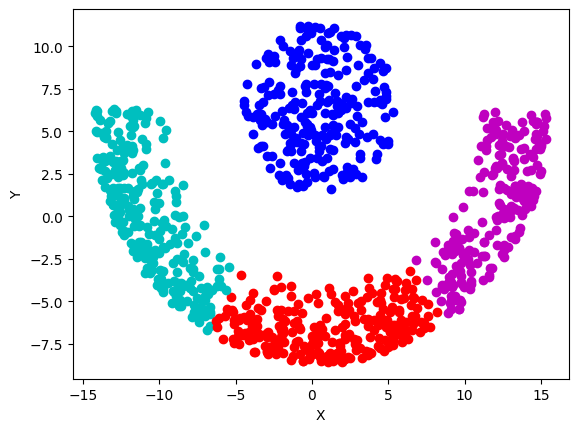

In [566]:
color = ['m', 'b', 'c', 'g', 'r']
for i in range(1000):
  plt.scatter(x[i][0], x[i][1], c = color[-1+int(z[i])-1])
plt.xlabel('X')
plt.ylabel('Y')

In [567]:
min1 = [-10,0]
max2 = [10,0]

for i in range(1000):
  if(z[i] == 1):

    if(x[i,1] < min1[0]):
      min1[0] = x[i,0]
      min1[1] = x[i,1]

  elif(z[i] == 2):
    if(x[i,0] > max2[0]):
      max2[0] = x[i,0]
      max2[1] = x[i,1]

<ipython-input-568-3e1179c989f9>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(x[i][0], x[i][1], c=color[int(z[i]) - 1])


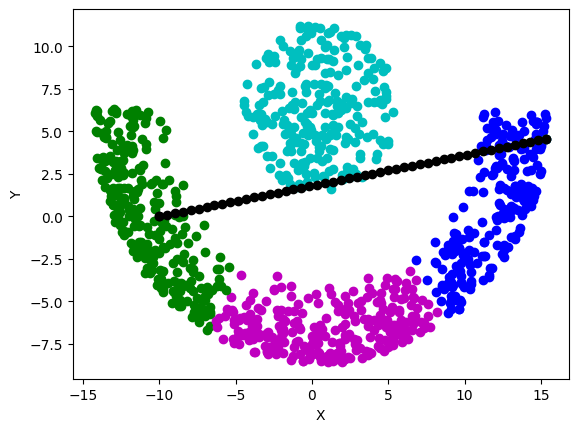

In [568]:
color = ['m', 'b', 'c', 'g', 'r']
for i in range(1000):
  plt.scatter(x[i][0], x[i][1], c=color[int(z[i]) - 1])
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(max2[0],max2[1],c = 'green')
plt.scatter(min1[0],min1[1],c = 'black')

#slo = (max2[1] - min1[1])/(max2[0] - min1[0])
lx = np.linspace(min1[0],max2[0],50)
#lx = np.linspace(-1.5,1.5,100)
ly = np.linspace(min1[1],max2[1],50)

#plt.title('the black line is the vornoi region seperator')
plt.scatter(lx,ly, color = 'k')

In [569]:
def voronoi(x, nodes, k): # Approximation using end points of cluster
  for l in range(nodes.shape[0]):
    for i in range(n):
      plt.scatter(x[i][0], x[i][1], c = color[(int)(z[i])-1])
    x_min= x[:, 0].min()- 1
    x_max= x[:, 0].max() + 1
    y_min= x[:, 1].min() - 1
    y_max = x[:,1].max() + 1

    x_x, y_y = np.meshgrid (np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z= np.argmin(np.sqrt(((np.c_[x_x.flatten(), y_y.flatten()] - nodes[:, np.newaxis])**2).sum(axis=2)), axis=0)
    Z = Z.reshape(x_x.shape)
    plt.imshow(Z[::-1, :], extent=(x_x.min(),x_x.max(),y_y.min(),y_y.max()), alpha = 0.1)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Voronoi Regions")
  plt.show()

<ipython-input-569-b5cda76ce226>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(x[i][0], x[i][1], c = color[(int)(z[i])-1])


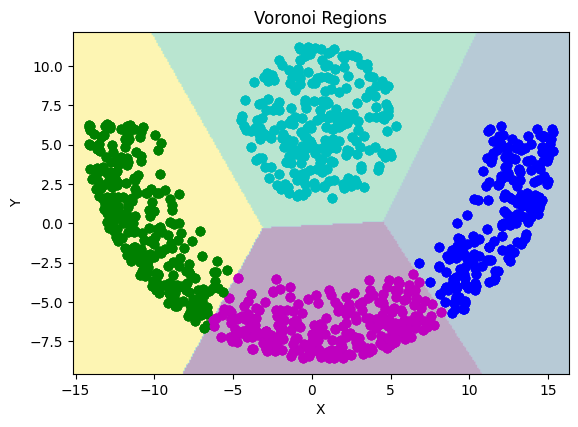

In [570]:
voronoi(x, mean, z)

#### Ideal Split

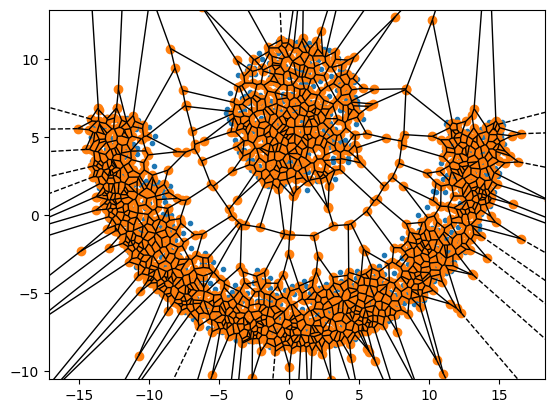

In [571]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x)
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

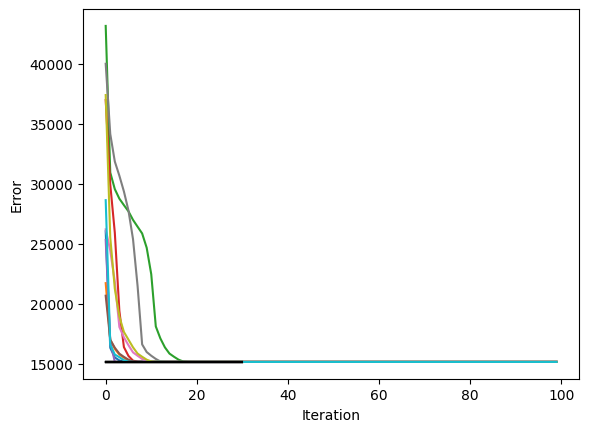

In [572]:
min = 90000
for trials in range(10):
  z, mean = kmeans(x)
  te =  errr(x, z, compute_mean(x, z))
  if min > te:
    min = te

  xx = np.linspace(0,30,30)
  plt.plot(xx, np.full(30, min), c = 'k')
  #plt.plot(error, color = c[trials])

<ipython-input-573-52da5a130ae4>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(x[i][0], x[i][1], c = color[-1+int(z[i])-1])


Text(0, 0.5, 'Y')

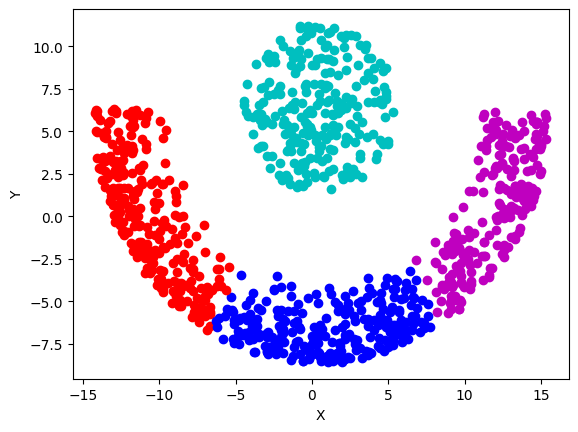

In [573]:
color = ['m', 'b', 'c', 'g', 'r']
for i in range(1000):
  plt.scatter(x[i][0], x[i][1], c = color[-1+int(z[i])-1])
plt.xlabel('X')
plt.ylabel('Y')